<a href="https://www.kaggle.com/code/dimasjackson/logistic-regression-clearly-explained?scriptVersionId=119781190" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Logistic Regression

Logistic Regression is a statistical model that is used in classification and predictive analysis. This model is also know as Logit and it is characterized by a single binary dependent variable, i. e. a variable that only can take two values, often labeled as 0 and 1. Binary values are widely udsed in statistics to model the probablity of a certain event occuring, such as the probability of a pacient being health, a tumor being malignant or not, if an email is spam or not and if a team win or loose. Therefore, Logistic Regression has a large variety of applications. 

The logistic function is defined by:
$$ p(x) = \dfrac{1}{1+e^{-(x-\mu)/s}} $$
where $\mu$ is the midpoint of the curve ($p(\mu)=1/2$) and $s$ a scale parameter that determines the spread of the probability distribution. This function is also called **sigmoid function**, because of its 's' shape.

The logistic fuction is used to generate predictions as we will see below. Furthermore, it is interesting to write this function as 
$$ p(x) = \dfrac{1}{1+e^{-(\beta_0 + \beta_1 x)}} \,,$$ 
where $\beta_0 = -\mu/s$ is the intercept of the line $y = \beta_0 + \beta_1 x$ and $\beta_1 = 1/s$ is its slope. The parameter $\beta_0$ is also called "bias" and $\beta_1$ "weights". The particular values of these quantities that maximizes the likelyhood function are what we need to find to make predictions.

In [1]:
# Defining the sigmoid function

import numpy as np # Importing a linear algebra package
import matplotlib.pyplot as plt # To plot figures

def sigmoid(beta_1, beta_0, x):
    return 1/(1+np.exp(-(beta_1*x-beta_0)))

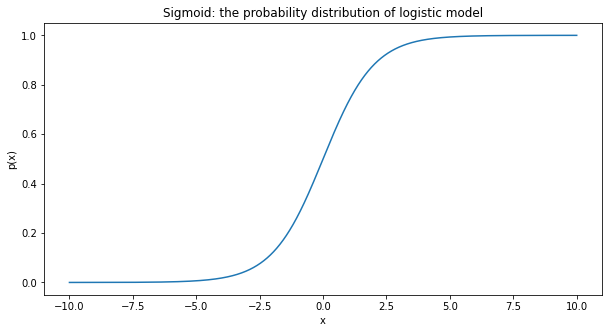

In [2]:
x = np.linspace(-10,10,10000) # Defining a interval
y = sigmoid(1,0,x) # Defining the dependent variable
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.title("Sigmoid: the probability distribution of logistic model")
plt.xlabel(xlabel="x")
plt.ylabel(ylabel="p(x)")
plt.show()


# Types of Logistic Regression

1. **Binary Logistic Regression:** In this case the categorical variable (target) has only two possible outcomes. Examples: Spam or Not, diagnostic positive or negative, some equipment failed or not, students pass or fail in an exam.

2. **Multinomial Logistic Regression:** The target contains three or more categories without ordering. Examples: Predicting if a individual is vegetarian, meat-eater or vegan, customer segmentation.

3. **Ordinal Logistic Regression:** The target containd three or more categories with ordering. Example: Movie rating from 1 to 5.

In this tutorial we will implement from scratch a binary logistic regression model.


# Example

The binary logistic regression can be used with one **explanatory variable** and two **categories** to answer a question. As an example, consider the case of a group of students which are preparing for a exam. The question is: how does the number of study hours affect the probability of the student passing the exam? In this case the explanatory variable is the number of hours studying and the two categories are being approved or not. Let's consider 10 students that spends between 0 to 10 hours studing and use 1 to identify "pass" and 0 to "fail". Then, we have the following "sintetic" data:

In [3]:
import pandas as pd # Data set management

df = pd.DataFrame(data={"Hours":[0,1,2.5,4,4,4.5,5,6,8,10],"Pass":[0,0,0,0,1,0,1,1,1,1]})
df

,Hours,Pass
0,0.0,0
1,1.0,0
2,2.5,0
3,4.0,0
4,4.0,1
5,4.5,0
6,5.0,1
7,6.0,1
8,8.0,1
9,10.0,1


To predict if a student will pass or not we need to consider the loss function, which is a function that represents the "price to pay" for inaccuracy of predictions. Usually, the logistic loss function is used as the measure of goodness of a fit in logistic regression. Considering that $p_k$ is the probability that the $k-$th student will pass the exam and $1-p_k$ the fail probability, the log loss for the $k-$th point is:
$$ \begin{cases}
-\ln p_{k} & \text{if }y_{k}=1\\
-\ln(1-p_{k}) & \text{if }y_{k}=0
\end{cases} $$

Note that log loss is always greater than or equal to 0, equals 0 only in case of a perfect prediction, and approaches to infinity when predictions get worse. The two cases can be combined into a function called cross entropy:
$$ -y_k \ln p_k -(1-y_k) \ln (1-p_k) $$

The sum of the this term for all elements is the negative likelihood function:
$$ -l = -\sum_k^N [y_k \ln p_k +(1-y_k) \ln (1-p_k)]$$

To estimate the probability of an outcome we need to find the values of $\beta_0$ and $\beta_1$ that minimizes the negative likelihood (or maximizes the positive likelihood, if you prefer). This is accomplished taking the derivative of the likelihood with respect to these parameters (or applying the gradient operator in high dimension problems):
$$ 0 = \frac{\partial l}{\partial \beta_0} = \sum_{k=1}^N(y_k-p_k) $$
$$ 0 = \frac{\partial l}{\partial \beta_1} = \sum_{k=1}^N(y_k-p_k)x_k $$
Then we need to solve the above two equations for  $\beta_{0}$ and $\beta_{1}$, which generally requires the use of numerical methods. For example, we may start with $\beta_0 = 0$ and $ \beta_1 = 0$ and iterate the model increasing these parameters by a fraction of the gradient. After that, the probability of passing or failing the exam can be calculated using the sigmoid function
$$ p = \dfrac{1}{1+e^{-t}}\,,$$
where $t = \beta_0 + x\beta_1$. Let's implement this calculation using python functions



# Our Implementation

 We will start with $\beta_0 = 0$ and $ \beta_1 = 0.01(1,1,\dots,1)$ and iterate the model increasing these parameters by a fraction of the gradient. This fraction amount is usually called "learning rate".

In [4]:
# Defining the initial parameters (zeros)
def weightInitialization(n_features):
    beta_1 = np.full((n_features),0) # Note that beta_1 must have the same dimension of x
    beta_0 = 0
    return beta_1,beta_0

In [5]:
# Defining the sigmoid function
def sigmoid_vec(t):
    p = 1/(1+np.exp(-t)) # The .T means the transpose of x and np.dot the dot product
    return p

In [6]:
# Calculates the likelihood and the derivatives
def log_model(beta_1, beta_0, x, y):
       
    #Prediction
    t = np.dot(beta_1, x.T) + beta_0
    prob = sigmoid_vec(t)
    y = np.array(y)
    likelihood = np.sum( -y*np.log(prob) - (1 - y)*np.log(1 - prob) )/x.shape[1] # The factor 1/x.shape[1] is for scaling by the n# of features
    
    #Gradient calculation
    dbeta_1 = np.dot(x.T, (prob-y))/x.shape[1]
    dbeta_0 = np.sum(prob-y)/x.shape[1]
    
    gradients = {"dbeta_1": dbeta_1, "dbeta_0": dbeta_0}
    
    return gradients, likelihood, prob 

In [7]:
# Iterate the model to make it learn
def model_predict(n_features, x, y, learning_rate, n_iterations):
    beta_1, beta_0 = weightInitialization(n_features)
    costs = []
    
    for i in range(n_iterations):
        
        gradients, likelihood, prob = log_model(beta_1, beta_0, x, y)
        
        dbeta_1 = gradients["dbeta_1"]
        dbeta_0 = gradients["dbeta_0"]
        #weight update
        beta_1 = beta_1 - (learning_rate * dbeta_1)
        beta_0 = beta_0 - (learning_rate * dbeta_0)
        costs.append(likelihood)
        
            
    #final parameters
    y_prob = prob
    parameters = {"beta_1": beta_1, "beta_0": beta_0}
    gradient = {"dbeta_1": dbeta_1, "dbeta_0": dbeta_0}
        
    return parameters, gradient, costs, y_prob

In [8]:
# Create an array with the final predictions
# Given a bias beta_0, a weight beta_1 and a input x return the predicted probability of pass or fail
def predict(beta_1, beta_0, x): 
    t = np.dot(beta_1, x.T) + beta_0
    z = sigmoid_vec(t)
    y_pred = np.zeros(x.shape[0])
    for i in range(y_pred.shape[0]):
        if z[i] > 0.5:
            y_pred[i] = 1
    return y_pred

Finally, we define a function to encompass all the functions above:

In [9]:
# Defining our logistic regression model
def my_Logistic_Regression(x_train, y_train, x_test, learning_rate, n_iterations):
    n_features = x_train.shape[1] # Dimension of the input
    beta_1, beta_0 = weightInitialization(n_features) # Defined above
    parameters, gradients, costs, y_prob = model_predict(n_features, x_train, y_train, learning_rate, n_iterations)# Defined above
    y_pred = predict(parameters["beta_1"], parameters["beta_0"], x_test) # Defined above
    return y_pred, y_prob

Now, we will load the Scikit Learning implementation of Logistic Regression to compare with our implementation.

# Scikit Learning Implementation

The Scikit Learn `linear_model.LogisticRegression()` class implements a regularized logistic regression. his implementation can fit binary, One-vs-Rest, or multinomial logistic regression.

In [10]:
from sklearn.linear_model import LogisticRegression

Let's us import a data set to make predictions. As an example we will use a data set from National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of  these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

In [11]:
import pandas as pd

diabetes_df = pd.read_csv('/kaggle/input/diabetes-dataset/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The outcome collumn dysplay 1 for a positive diabetes diagnostic and 0 for negative. 

Now, we will remove this columns and split the data in a train and test data frames.

In [12]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
from sklearn.model_selection import train_test_split
y = diabetes_df['Outcome']
X = diabetes_df.drop(axis=1, columns='Outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5)

### Fit the Model

In [14]:
# Defining our logistic regression model fixing a random state (to do always the same predictions) and the number of iterations 
sk_model = LogisticRegression(random_state=1, max_iter=150)
# Training our model
sk_model.fit(X_train, y_train)

LogisticRegression(max_iter=150, random_state=1)

In [15]:
# Making predictions
sk_predictions = sk_model.predict(X_test)

# Measuring performance of Scikit Learning predictions

In [16]:
# Importing a metric
from sklearn.metrics import accuracy_score, classification_report

In [17]:
sk_score = accuracy_score(y_test, sk_predictions)
sk_score

0.7708333333333334

In [18]:
print(classification_report(y_test, sk_predictions))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       246
           1       0.74      0.57      0.64       138

    accuracy                           0.77       384
   macro avg       0.76      0.73      0.74       384
weighted avg       0.77      0.77      0.76       384



This means that the Scikit Learning logistic model with the parameters choice above hit the predictions nearly $77\%$ of the time, for the Diabets dataset. Its not so good having $23\%$ of a population being incorrectly diagnosed, but its important to note that this is a simple example, to improve this score one can vary some parameters of the Logistic Regression class and fetch for correlation between the dependent variables. 

In [19]:
# Predict the classes on the test data, and return the probabilities for each class
sk_y_prob = sk_model.predict_proba(X_test)

In [20]:
# Calculate the Cumulative Distribution Finction (CDF)
def cdf(sample, x, sort = False):
    '''
    Return the value of the Cumulative Distribution Function, evaluated for a given sample and a value x.
    
    Args:
        sample: The list or array of observations.
        x: The value for which the numerical cdf is evaluated.
    
    Returns:
        cdf = CDF_{sample}(x)
    '''
    
    # Sorts the sample, if needed
    if sort:
        sample.sort()
    
    # Counts how many observations are below x
    cdf = sum(sample <= x)
    
    # Divides by the total number of observations
    cdf = cdf / len(sample)
    
    return cdf

In [21]:
# Gets the class CDFs
def get_classes_cdf(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba
    
    # Recover each class
    class0 = df[df['real'] == 0].sort_values('proba')
    class1 = df[df['real'] == 1].sort_values('proba')
    
    # Calculates the cdfs
    cdf0 = np.array([cdf(class0['proba'].values, x, sort = False) for x in class0['proba'].values])
    cdf1 = np.array([cdf(class1['proba'].values, x, sort = False) for x in class1['proba'].values])
    
    # Results
    results =  {
        'cdf0': cdf0,
        'cdf1': cdf1,
        'proba0': class0['proba'].values, 
        'proba1': class1['proba'].values, 
    }
    
    return results

In [22]:
sk_cdf = get_classes_cdf(y_test, sk_y_prob[:, 1])

In [23]:
import seaborn as sns # Data visualization

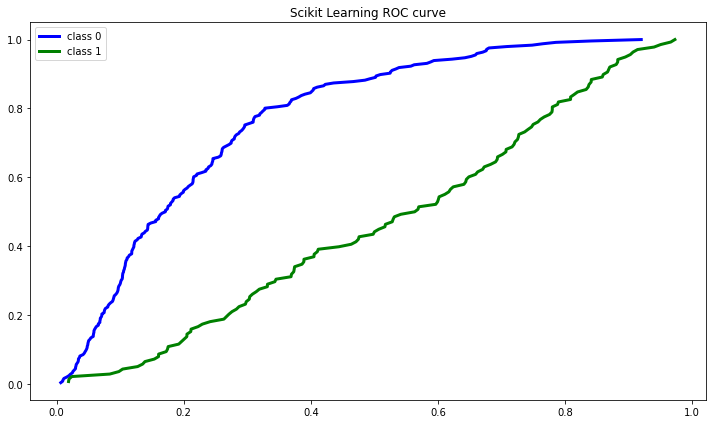

In [24]:
# Visualize the ROC curve
fig = plt.figure(figsize = (10, 6))
ax1 = plt.subplot()

ax1.set_title("Scikit Learning ROC curve")
sns.lineplot(x = sk_cdf['proba0'], y = sk_cdf['cdf0'], color = 'b', ax = ax1, linewidth = 3)
sns.lineplot(x = sk_cdf['proba1'], y = sk_cdf['cdf1'], color = 'g', ax = ax1, linewidth = 3)
ax1.legend(["class 0", "class 1"])

plt.tight_layout()

In [25]:
from scipy.stats import ks_2samp # Kolmogorv-Smirnov (KS) Test
from sklearn.metrics import roc_auc_score #ROC Area Under Curve (AUC) score

In [26]:
# Calculate the KS and the AUC values
def evaluate_ks_and_roc_auc(y_real, y_proba):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_real
    df['proba'] = y_proba
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    return ks.statistic, roc_auc

In [27]:
print("Scikit Learning classifier:")
ks_sk, auc_sk = evaluate_ks_and_roc_auc(y_test, sk_y_prob[:, 1])

Scikit Learning classifier:
KS: 0.5274 (p-value: 2.401e-23)
ROC AUC: 0.8303


# Comparing our Logistic Model with the Scikit Learning Class 

In [28]:
my_pred, my_y_prob = my_Logistic_Regression(X_train, y_train, X_test, learning_rate=1e-6, n_iterations=500)

In [29]:
accuracy_score(y_test, my_pred)

0.6432291666666666

Our implementation scored relatively well compared to the Scikit Learning class for this particular case.

**Note:** The best result is reached when the learning rate is chosen to avoid the gradients being much greater (or smaller) than the parameters $\beta$. For this particular dataset the learning rate of the order of $10^{-6}$ performs well.  

In [30]:
par, grad, costs, prob = model_predict(X_train.shape[1], X_train, y_train, 1e-6, 500)

Text(0, 0.5, 'Likelihood')

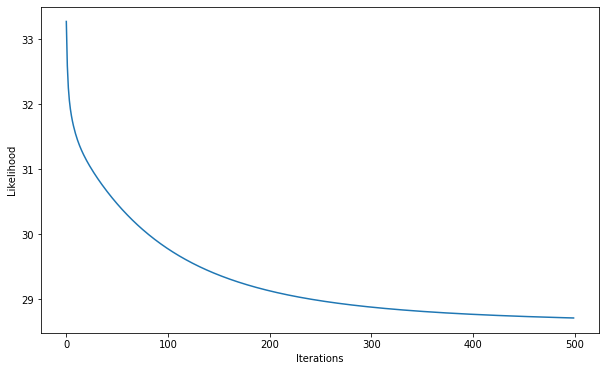

In [31]:
plt.figure(figsize = (10, 6))
plt.plot(costs)

plt.xlabel(xlabel="Iterations")
plt.ylabel(ylabel="Likelihood")

# Performance Measurement

### Confusion Matrix

The confusion matrix can tells us the number of true/false positive/negative predictions. By the time, we can calculate the precision rate, the missclassification rate, accuracy, prevalacence, etc. Let's see with more details the quantities that we can calculate using confusion matrix:

1) Accuracy = (TP+TN/total) Is the overall evaluation of the classifier.

2) Sensitivity = TP/(actual number of 1's) Indicates how many times 1 is predicted correctly.

3) Fall-out = FP/(actual number of 0's) Indicates how many times 1 is predicted when actual answer is 0.

4) Specificity = TN/(actual number of 0's) Indicates how many times 0 is predicted correctly.

5) Misclassification Rate = (FP+FN)/(total) Tells about how often our model is wrong.

6) Precision = TP/(TP + FP) Gives the rate of correct predictions.

7) Prevalence = (actual number of 1's /total) Indicates how often condition 1 really occurs.

In [32]:
from sklearn.metrics import confusion_matrix

c_matrix = confusion_matrix(y_test, my_pred) # Calculate the confusion matrix

Text(33.0, 0.5, 'Actual')

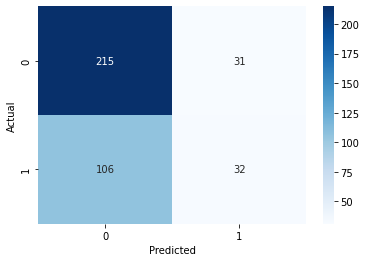

In [33]:
sns.heatmap(c_matrix, annot=True, cmap='Blues',fmt='.3g')
plt.xlabel(xlabel="Predicted")
plt.ylabel(ylabel="Actual")

In [34]:
accu = (c_matrix[0][0] + c_matrix[1][1])/np.sum(c_matrix)
sens = c_matrix[1][1]/(c_matrix[1][0]+c_matrix[1][1])
fall = c_matrix[0][1]/(c_matrix[0][0]+c_matrix[0][1])
spec = c_matrix[0][0]/(c_matrix[0][0]+c_matrix[0][1])
misc = (c_matrix[0][1] + c_matrix[1][0])/np.sum(c_matrix)
prec = c_matrix[1][1]/(c_matrix[1][1]+c_matrix[0][1])
prev = (c_matrix[1][1] + c_matrix[1][0])/np.sum(c_matrix)

In [35]:
print("Accuracy: %.2f" % accu)
print("Sensitivity: %.2f" % sens)
print("Fall-out: %.2f" % fall)
print("Specificity: %.2f" % spec)
print("Misclassification Rate: %.2f" % misc)
print("Precision: %.2f" % prec)
print("Prevalence: %.2f" % prev)

Accuracy: 0.64
Sensitivity: 0.23
Fall-out: 0.13
Specificity: 0.87
Misclassification Rate: 0.36
Precision: 0.51
Prevalence: 0.36


Looking at the specificity we can see that our model is good to predict a negative result but the precision (true positive rate) shows that it does'n performed well on positive diagnostics.

In [36]:
print(classification_report(y_test, my_pred))

              precision    recall  f1-score   support

           0       0.67      0.87      0.76       246
           1       0.51      0.23      0.32       138

    accuracy                           0.64       384
   macro avg       0.59      0.55      0.54       384
weighted avg       0.61      0.64      0.60       384



The recall and the f1 score aren't so good for the positive diagnosis like the Scikit Learning package.

In [37]:
my_cdf = get_classes_cdf(y_test, my_y_prob)

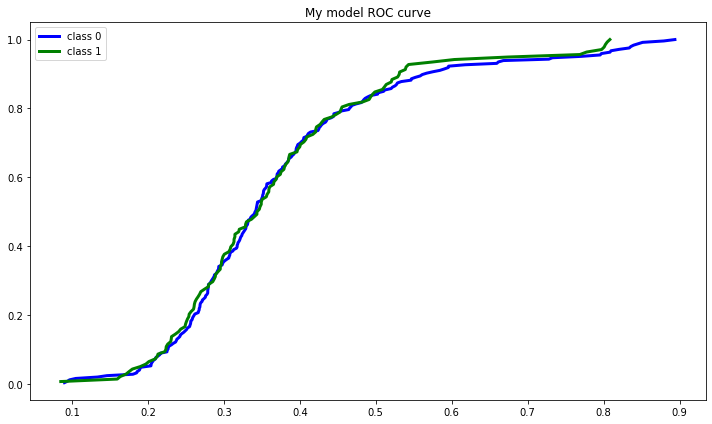

In [38]:
# Visualize the ROC curve
fig = plt.figure(figsize = (10, 6))
ax1 = plt.subplot()

ax1.set_title("My model ROC curve")
sns.lineplot(x = my_cdf['proba0'], y = my_cdf['cdf0'], color = 'b', ax = ax1, linewidth = 3)
sns.lineplot(x = my_cdf['proba1'], y = my_cdf['cdf1'], color = 'g', ax = ax1, linewidth = 3)
ax1.legend(["class 0", "class 1"])

plt.tight_layout()

In [39]:
print("My classifier:")
ks_my, auc_my = evaluate_ks_and_roc_auc(y_test, my_y_prob)

My classifier:
KS: 0.0504 (p-value: 9.677e-01)
ROC AUC: 0.4934


# References

* [Logistic Regression - Wikipedia](https://en.wikipedia.org/wiki/Logistic_regression#Definition)
* [Logistic Regression — Detailed Overview](https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc)
* [Logistic Regression Implementation](https://www.kaggle.com/code/kanncaa1/logistic-regression-implementation)
* [Performance Measurement in Logistic Regresion](https://meettank29067.medium.com/performance-measurement-in-logistic-regression-8c9109b25278)

### If this notebook was helpful to you, consider to give an upvote! Best regards! 